In [34]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [5]:
df=pd.read_fwf("C:\\Users\\admin\\Downloads\\MiniBooNE_PID.txt")

In [6]:
df.head()

,36499 93565,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,...,101.174,-31.3730,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,...,186.516,45.9597,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,...,129.931,-11.5608,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,...,163.978,-18.4586,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,...,229.555,42.9600,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893


In [7]:
a=[]
for i in range(1,51):
    a.append("pid"+str(i))
print (a)

['pid1', 'pid2', 'pid3', 'pid4', 'pid5', 'pid6', 'pid7', 'pid8', 'pid9', 'pid10', 'pid11', 'pid12', 'pid13', 'pid14', 'pid15', 'pid16', 'pid17', 'pid18', 'pid19', 'pid20', 'pid21', 'pid22', 'pid23', 'pid24', 'pid25', 'pid26', 'pid27', 'pid28', 'pid29', 'pid30', 'pid31', 'pid32', 'pid33', 'pid34', 'pid35', 'pid36', 'pid37', 'pid38', 'pid39', 'pid40', 'pid41', 'pid42', 'pid43', 'pid44', 'pid45', 'pid46', 'pid47', 'pid48', 'pid49', 'pid50']


In [8]:
df.columns=a

In [9]:
df.head()

,pid1,pid2,pid3,pid4,pid5,pid6,pid7,pid8,pid9,pid10,...,pid41,pid42,pid43,pid44,pid45,pid46,pid47,pid48,pid49,pid50
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,...,101.174,-31.3730,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,...,186.516,45.9597,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,...,129.931,-11.5608,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,...,163.978,-18.4586,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,...,229.555,42.9600,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893


In [10]:
print ("Number of NULL values = ",df.isnull().sum())

Number of NULL values =  pid1     0
pid2     0
pid3     0
pid4     0
pid5     0
pid6     0
pid7     0
pid8     0
pid9     0
pid10    0
pid11    0
pid12    0
pid13    0
pid14    0
pid15    0
pid16    0
pid17    0
pid18    0
pid19    0
pid20    0
pid21    0
pid22    0
pid23    0
pid24    0
pid25    0
pid26    0
pid27    0
pid28    0
pid29    0
pid30    0
pid31    0
pid32    0
pid33    0
pid34    0
pid35    0
pid36    0
pid37    0
pid38    0
pid39    0
pid40    0
pid41    0
pid42    0
pid43    0
pid44    0
pid45    0
pid46    0
pid47    0
pid48    0
pid49    0
pid50    0
dtype: int64


In [11]:
df['target']=0

In [12]:
signal=36499
background=93565

In [13]:
df.iloc[:36499, len(df.columns)-1] = 1

In [14]:
df.head()

,pid1,pid2,pid3,pid4,pid5,pid6,pid7,pid8,pid9,pid10,...,pid42,pid43,pid44,pid45,pid46,pid47,pid48,pid49,pid50,target
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,...,-31.3730,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996,1
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,...,45.9597,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621,1
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,...,-11.5608,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901,1
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,...,-18.4586,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990,1
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,...,42.9600,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893,1


In [15]:
x=df.loc[:,'pid1':'pid50']
y=df.loc[:,'target':'target']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)
XY_train = pd.concat([X_train, Y_train], axis=1)
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_test.shape: {} Y_test.shape: {}".format(X_test.shape, Y_test.shape))

X_train.shape: (91044, 50) Y_train.shape: (91044, 1)
X_test.shape: (39020, 50) Y_test.shape: (39020, 1)


In [17]:
XY_train.describe()

,pid1,pid2,pid3,pid4,pid5,pid6,pid7,pid8,pid9,pid10,...,pid42,pid43,pid44,pid45,pid46,pid47,pid48,pid49,pid50,target
count,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,...,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000,91044.000000
mean,1.245739,5.085244,130.913434,3.881187,-3.589784,3.759345,4.567109,4.420151,7.038109,3.772413,...,-25.231190,-2.869075,9.579347,3.608077,3.776794,-3.757409,6.443986,-1.992183,3.829017,0.281424
std,60.156880,59.771110,190.750256,59.837372,59.854866,59.844795,59.797079,59.804976,59.648076,59.843899,...,67.607233,59.910799,59.669620,59.853772,59.843673,59.852857,59.713708,59.983076,59.840503,0.449696
min,-999.000000,0.070748,0.012381,0.108747,-999.000000,0.000000,0.000000,0.033510,2.397440,0.043223,...,-999.000000,-999.000000,0.249186,0.000000,0.000000,-999.000000,0.000417,-999.000000,0.000000,0.000000
25%,4.007245,0.883140,50.135025,0.241972,0.000000,0.086603,0.719711,0.784531,3.287120,0.143350,...,-40.105750,-0.028908,3.432203,0.000000,0.122472,-0.340275,1.432818,0.274357,0.197854,0.000000
50%,4.784855,1.387700,106.544000,0.272528,0.004983,0.141850,0.926764,0.834723,3.428510,0.171021,...,-21.531750,0.457309,4.772510,0.000000,0.168932,0.042489,2.378255,1.123340,0.231887,0.000000
75%,5.625775,1.957515,139.386000,0.315982,0.013086,0.215270,1.186565,0.874856,3.588060,0.200703,...,-3.345440,1.145713,6.875313,0.002028,0.225261,0.295969,3.800000,2.280712,0.263849,1.000000
max,17.057300,999.000000,4747.670000,999.000000,0.174658,999.000000,999.000000,999.000000,999.000000,999.000000,...,161.298000,43.651200,999.000000,999.000000,999.000000,1.789600,999.000000,24.272800,999.000000,1.000000


In [18]:
XY_train.groupby('target').size()

target
0    65422
1    25622
dtype: int64

# Exploratory Data Analysis

### Histogram

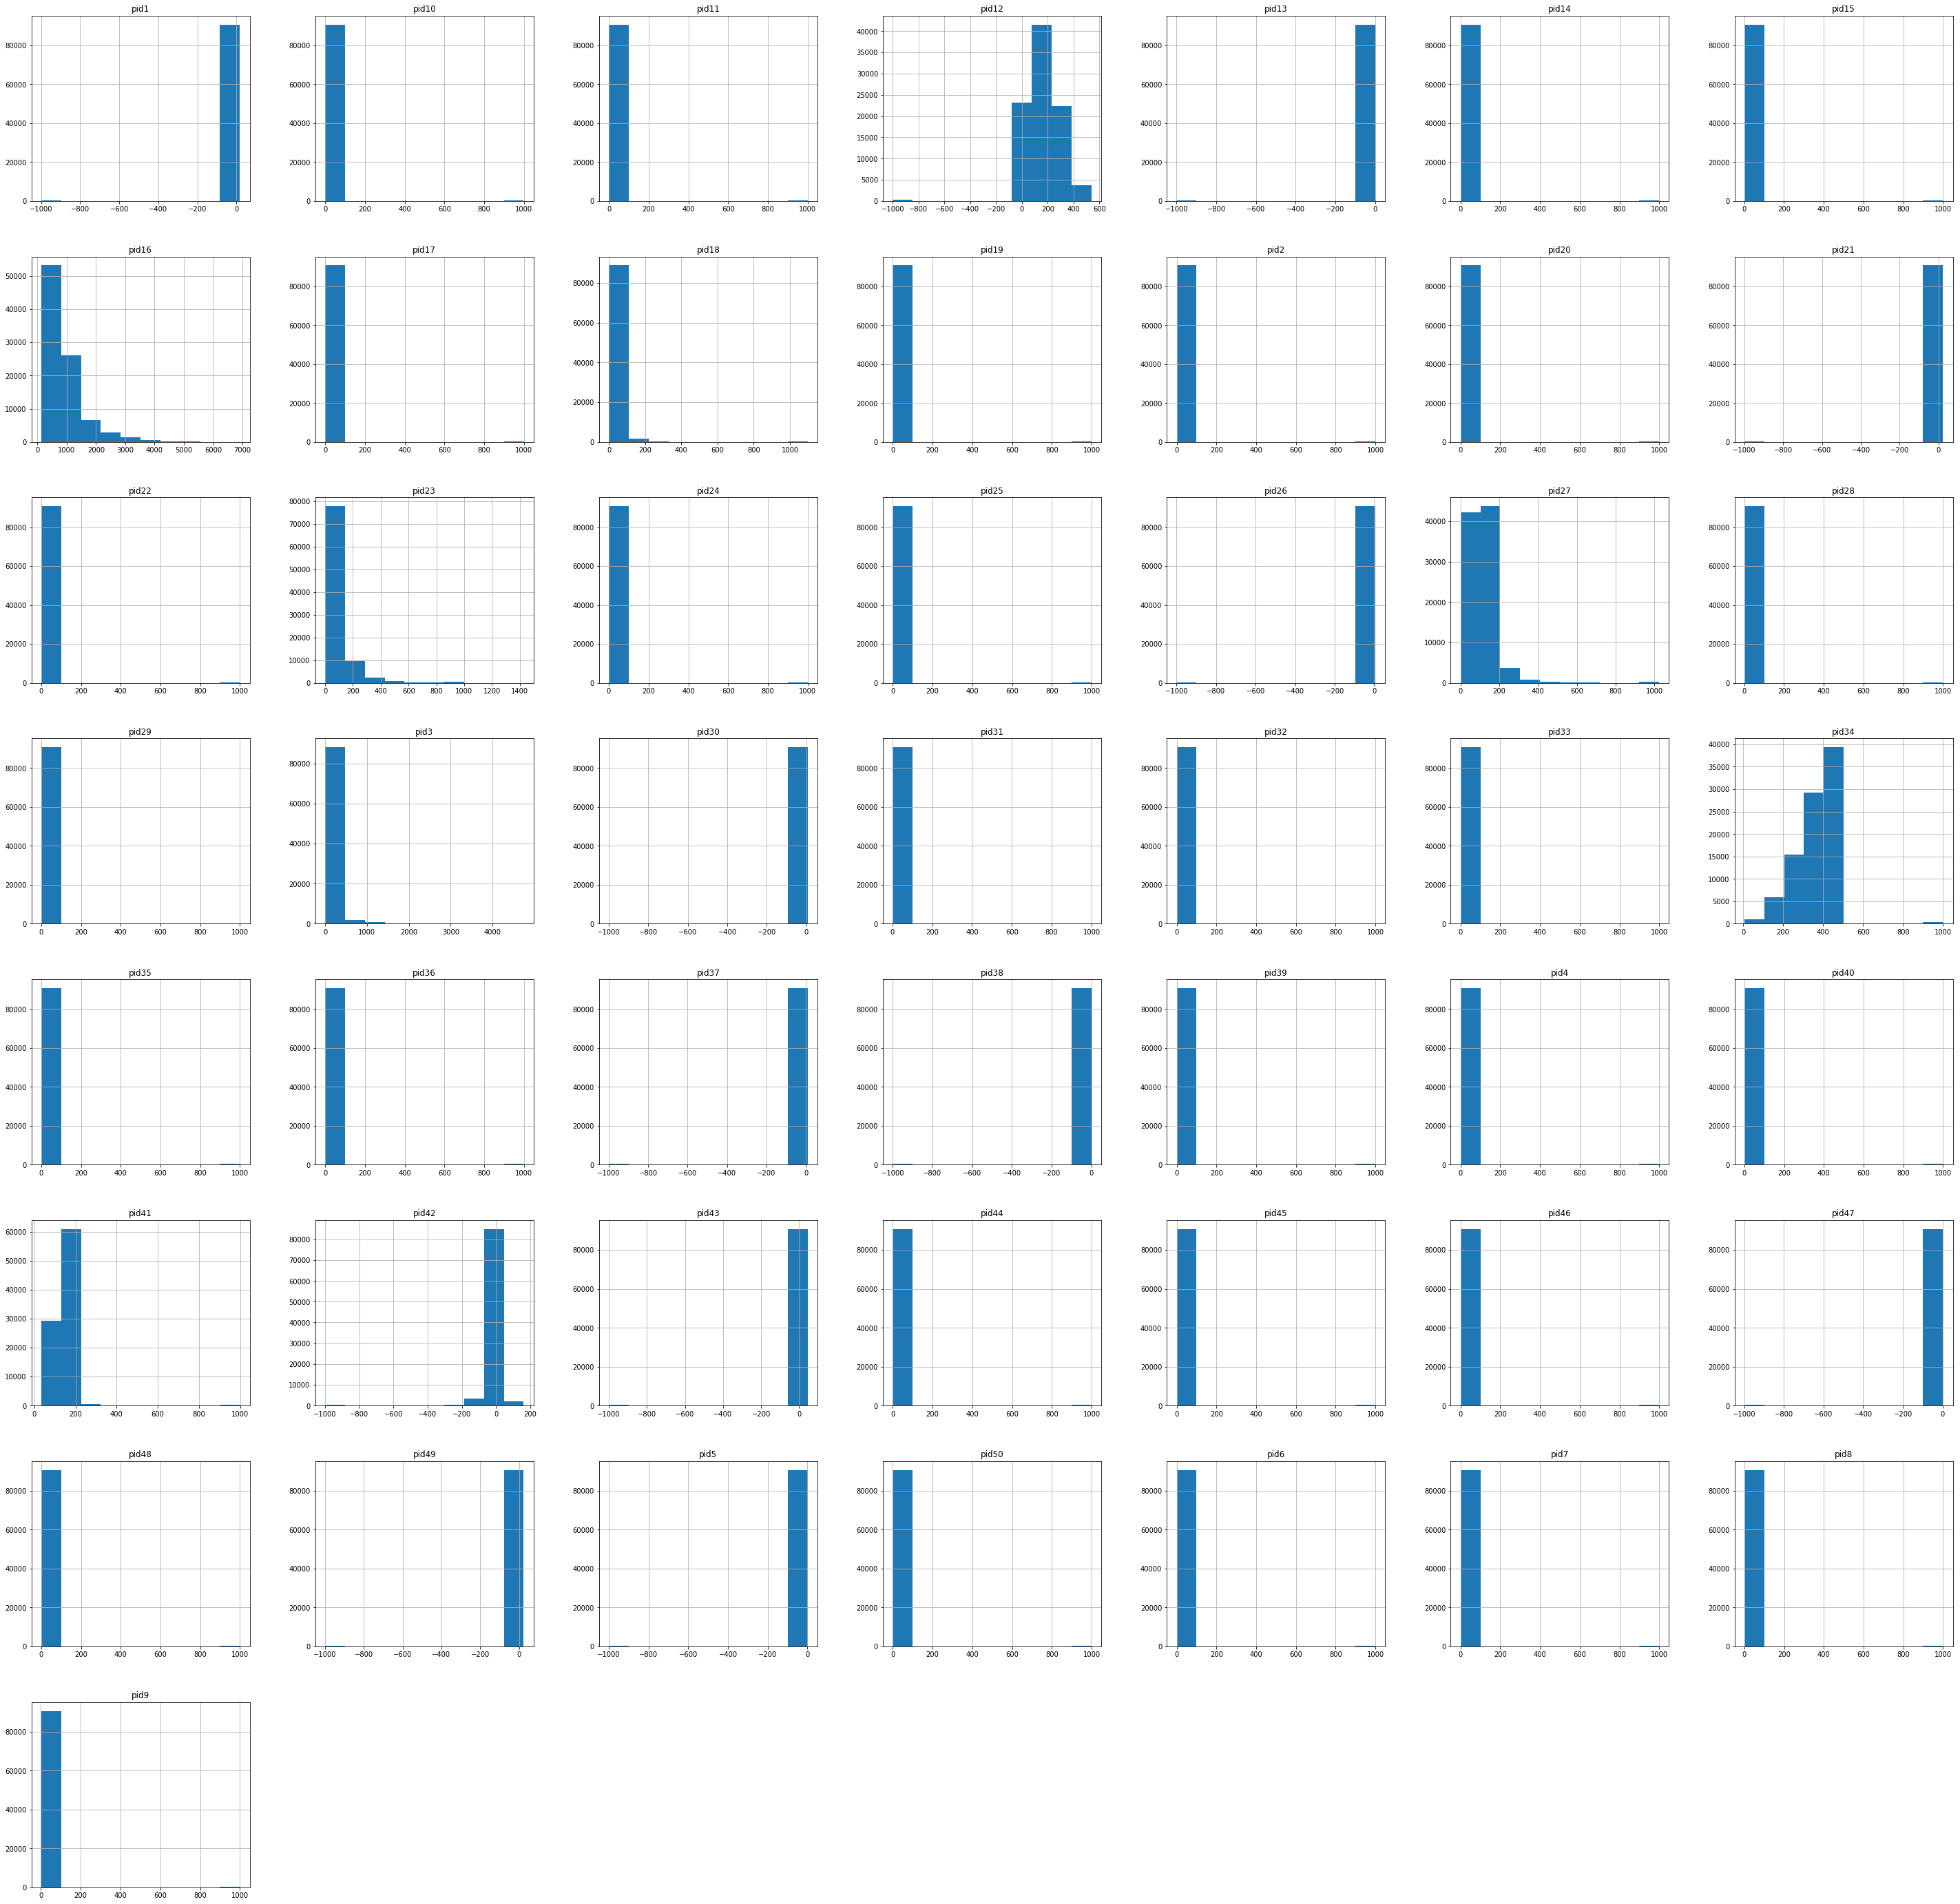

In [25]:
X_train.hist(figsize=(50,50))
plt.show()

###  Pearson Correlation Matrix

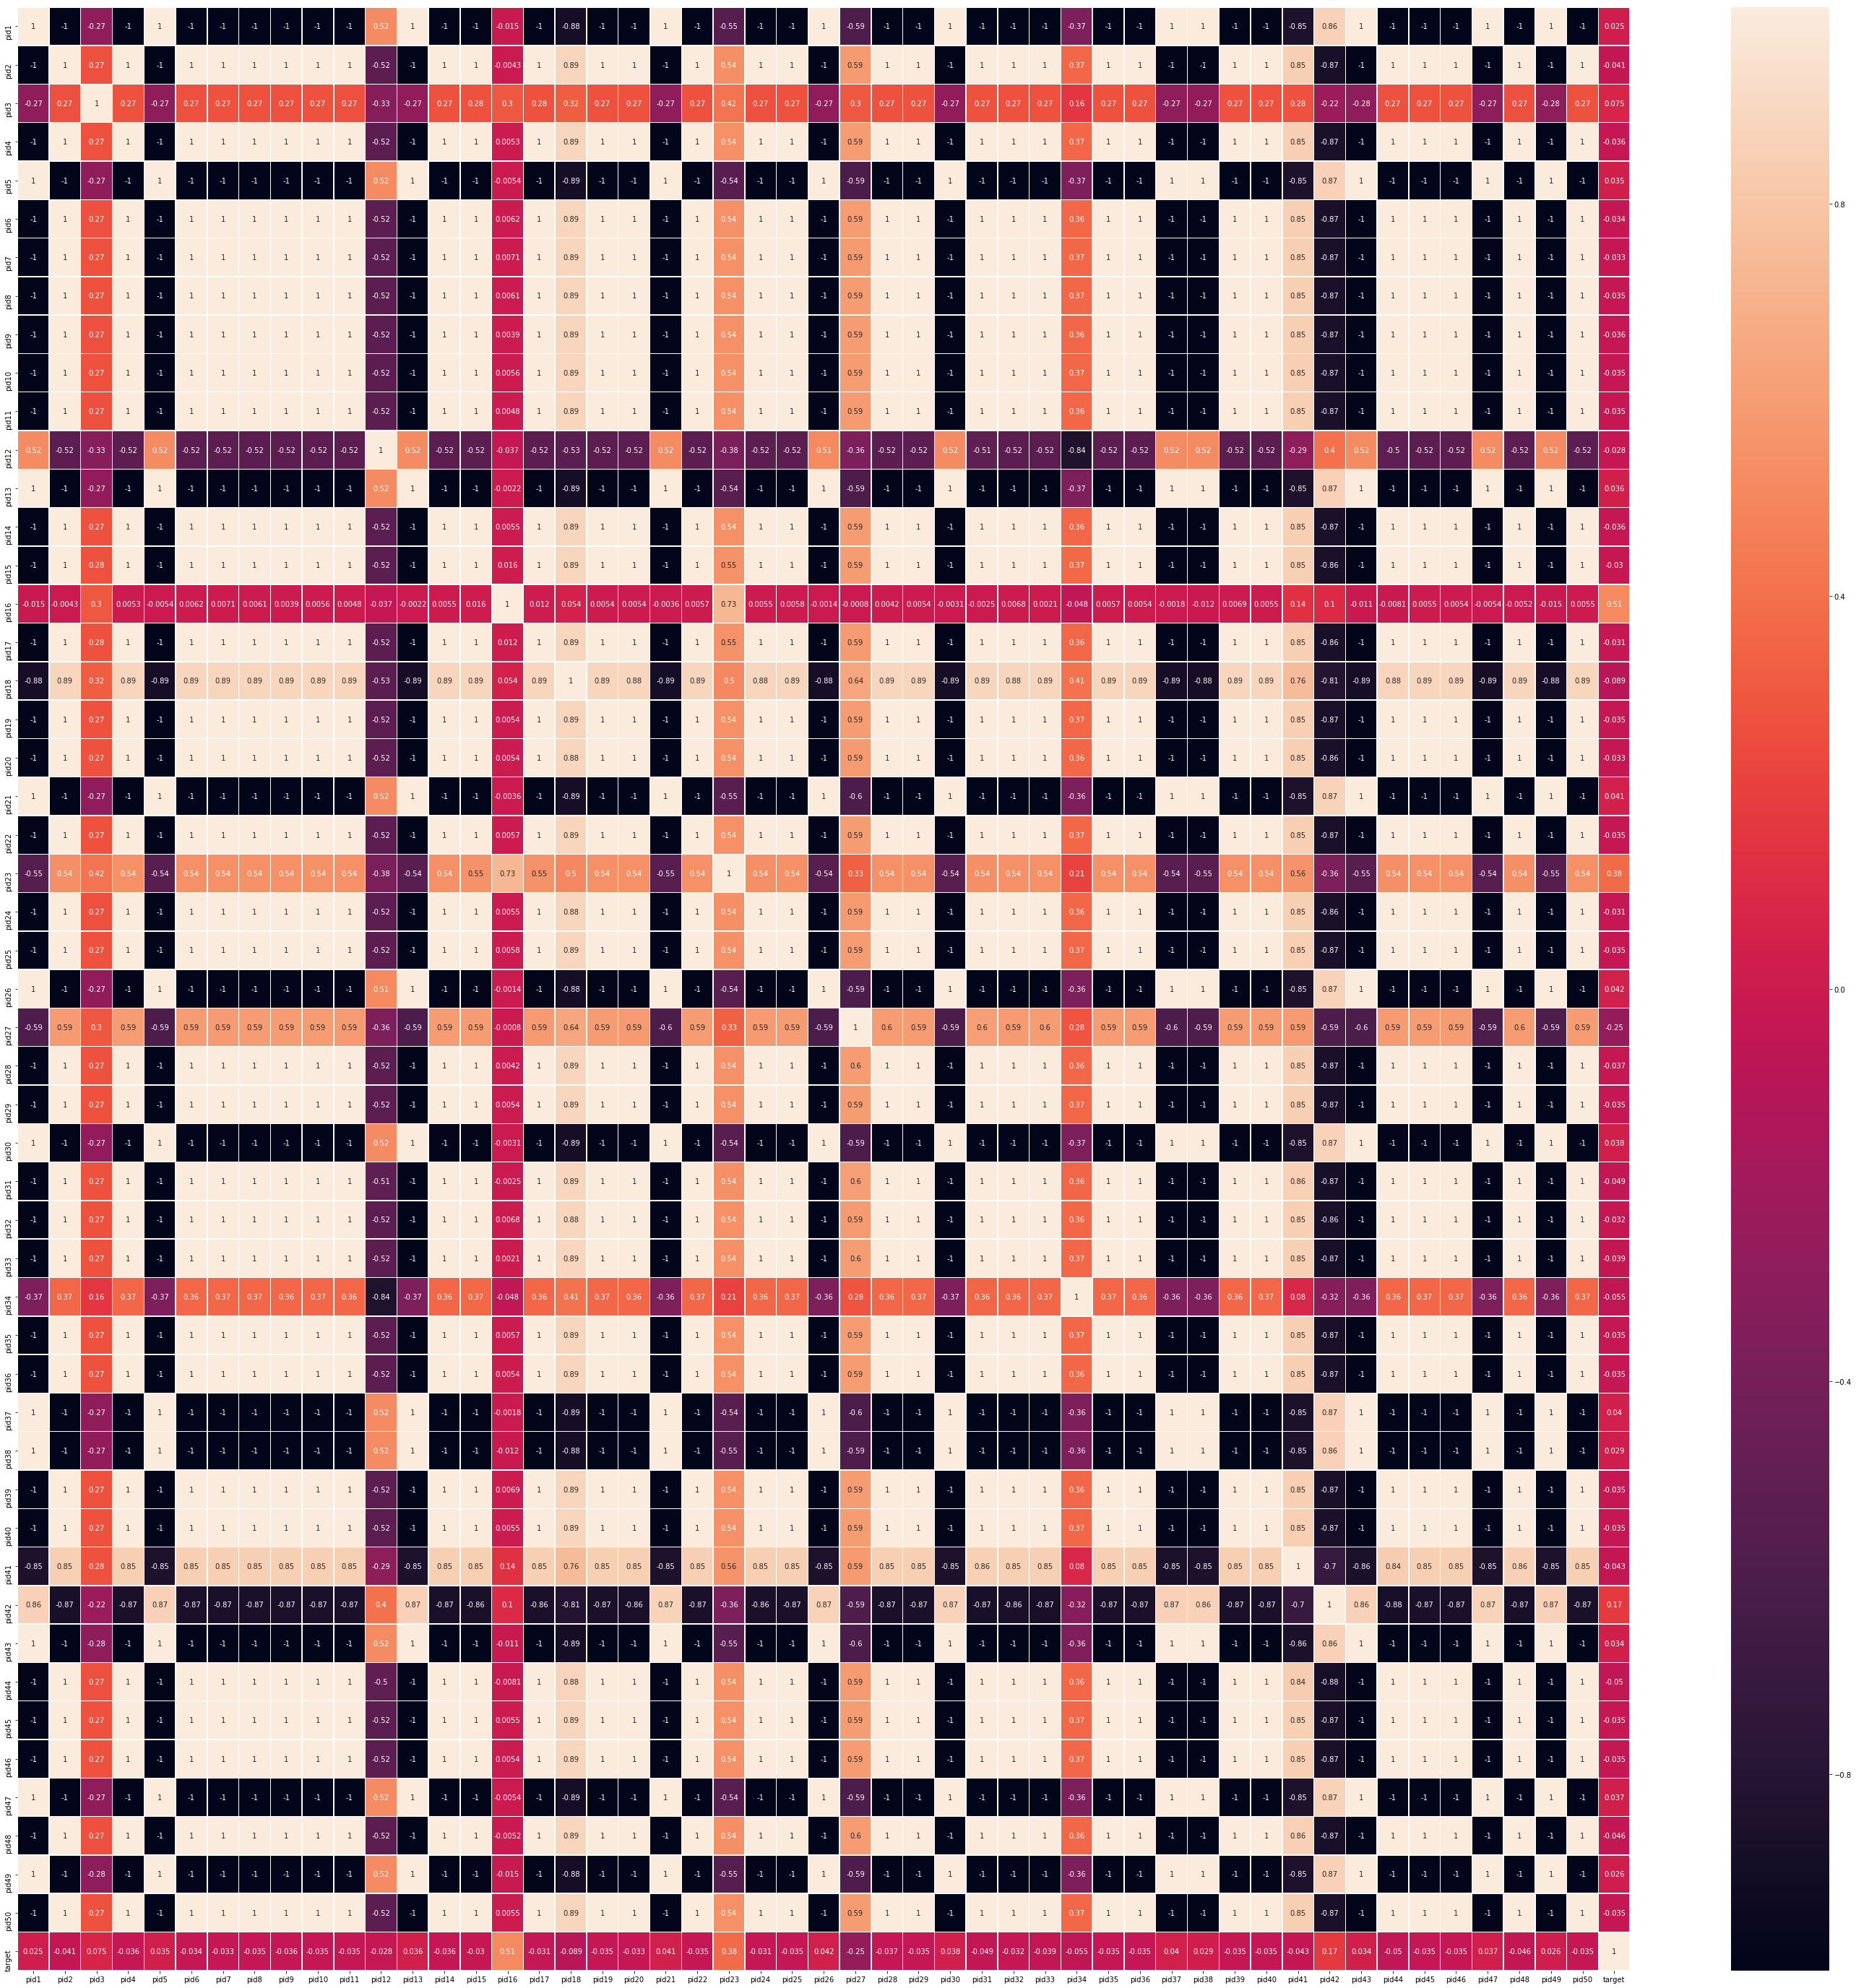

In [43]:
f,ax = plt.subplots(figsize=(50,50))
sns.heatmap(XY_train.corr(), annot=True, linewidths=.5,ax=ax)
plt.show()

In terms of the target variable, there are a few variables with medium correlation

The highest positive correlation is PID 16 followed by PID 23, and the highest negative is PID 27.

# KNN

In [20]:
n=[5,10,25,50,100]
def best_alpha(vec,vec_t):
    param_grid = {'n_neighbors': n}
    KNN =  KNeighborsClassifier()
    model = GridSearchCV(KNN, param_grid, scoring = 'roc_auc', cv=3 , n_jobs = -1)
    model.fit(vec, Y_train)
    print("Model with best parameters :\n",model.best_estimator_)
    print("Accuracy of the model : ",model.score(vec_t, Y_test))
    # Optimal value of number of neighbours
    print("The optimal number of K is : ",model.best_estimator_.n_neighbors)
    return model

def conf_mat(model):
    print("Best HyperParameter: ",model.best_params_)
    print(model.best_score_)
    scores = model.cv_results_['mean_test_score']
    plt.figure(figsize=(16, 12))
    plt.plot(n,scores)
    plt.title('Grid Search AUC_ROC_Score')
    plt.grid()
    plt.show()
    
def test(vec,vec_t,model):
    clf=KNeighborsClassifier(n_neighbors=model.best_estimator_.n_neighbors)
    clf.fit(X_train,Y_train)
    a=confusion_matrix(Y_test, clf.predict(X_test))
    print(a)
    d=pd.DataFrame(a,index=['Positive','Negative'],columns=['Positive','Negative'])
    plt.figure(figsize = (10,7))
    sns.heatmap(d, annot=True,fmt='g')
    plt.title('Test Confusion Matrix')
    plt.show()

In [21]:
model=best_alpha(X_train,X_test)

Model with best parameters :
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')
Accuracy of the model :  0.9485393701968203
The optimal number of K is :  50


Best HyperParameter:  {'n_neighbors': 50}
0.946892924932591


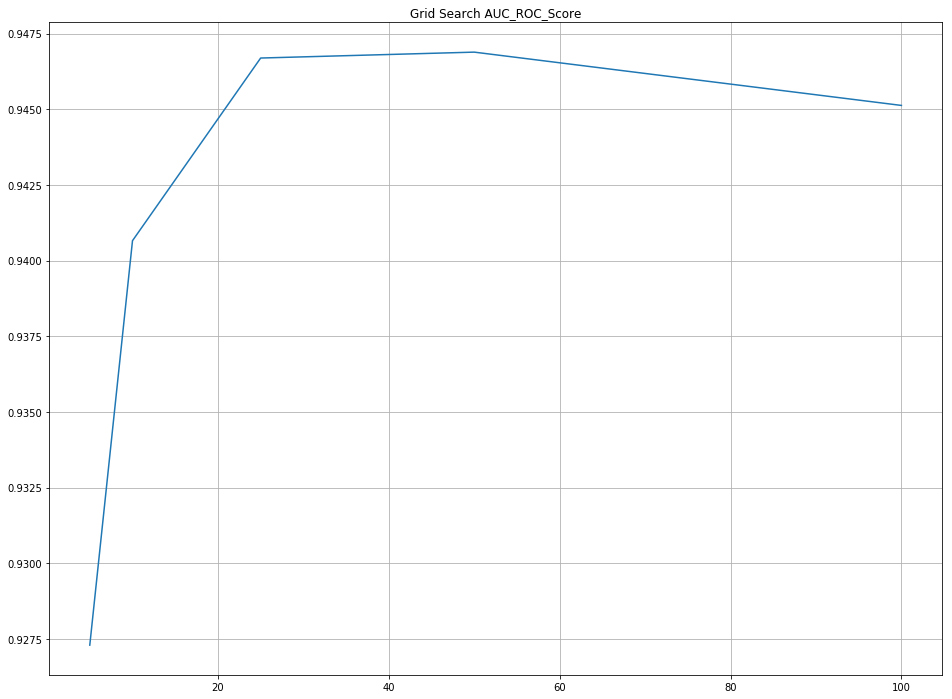

In [22]:
conf_mat(model)

[[26047  2096]
 [ 2346  8531]]


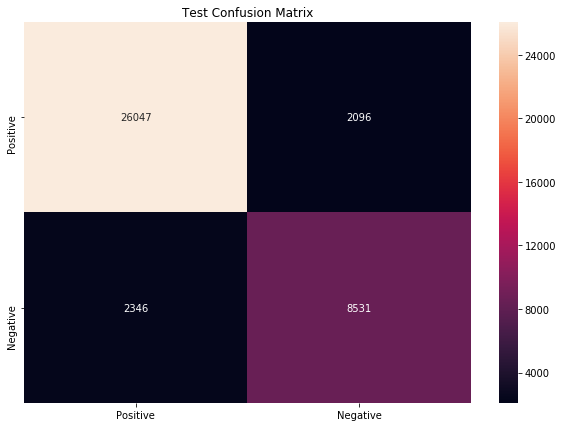

In [23]:
test(X_train,X_test,model)

# Logistic Regression

In [76]:
c=[0.001,0.01,0.1,1,10]
l=['l1','l2']
def best_alpha(vec,vec_t):   
    param_grid = {'C':c, 'penalty':l }
    lr=LogisticRegression()
    model = GridSearchCV(lr, param_grid, scoring = 'roc_auc', cv=3 , n_jobs = -1)
    model.fit(vec, Y_train)
    print("Model with best parameters :\n",model.best_estimator_)
    print("Accuracy of the model : ",model.score(vec_t, Y_test))
    # Optimal value of number of neighbours
    print("The optimal number of C is : ",model.best_estimator_.C)
    print("The penalty is : ",model.best_estimator_.penalty)
    return model

def conf_mat(model):
    print("Best HyperParameter: ",model.best_params_)
    print(model.best_score_)
    scores = model.cv_results_['mean_test_score'].reshape(len(c),len(l))
    plt.figure(figsize=(16, 12))
    sns.heatmap(scores, annot=True, fmt=".3f", xticklabels=l, yticklabels=c)
    plt.ylabel('C')
    plt.xlabel('penalty')
    plt.xticks(np.arange(len(l)), l)
    plt.yticks(np.arange(len(c)), c)
    plt.title('Grid Search AUC_ROC_Score')
    plt.show()
    
def test(vec,vec_t,model):
    lr=LogisticRegression(C=model.best_estimator_.C, penalty=model.best_estimator_.penalty)
    lr.fit(X_train,Y_train)
    a=confusion_matrix(Y_test, lr.predict(X_test))
    print(a)
    d=pd.DataFrame(a,index=['Positive','Negative'],columns=['Positive','Negative'])
    plt.figure(figsize = (10,7))
    sns.heatmap(d, annot=True,fmt='g')
    plt.title('Test Confusion Matrix')
    plt.show()
    return lr

In [23]:
model=best_alpha(X_train,X_test)

Model with best parameters :
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy of the model :  0.96238215863178
The optimal number of C is :  10
The penalty is :  l2


Best HyperParameter:  {'penalty': 'l2', 'C': 10}
0.96049246159793


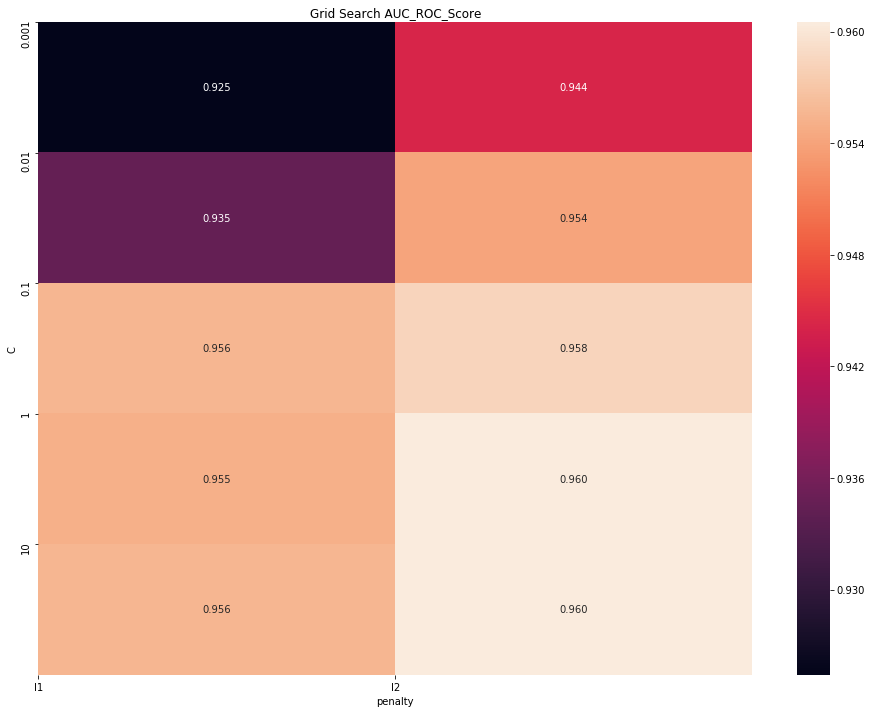

In [24]:
conf_mat(model)

[[26474  1669]
 [ 1781  9096]]


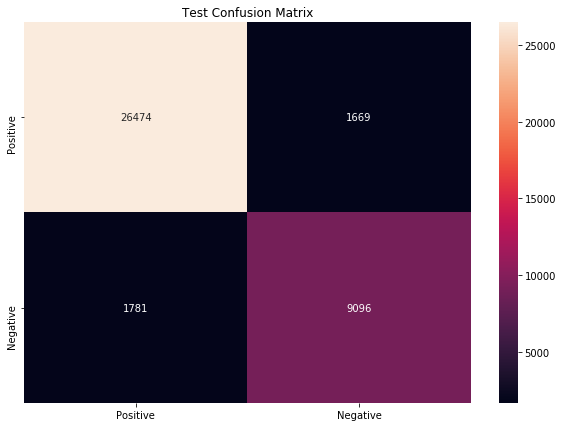

In [52]:
lr=test(X_train,X_test,model)

## Feature Importance

In [74]:
feature_names = df.columns
topn_class2 = sorted(zip(lr.coef_[0], feature_names), reverse=True)[:10]
print("************************")
print("Top 10 features")
for coef, feat in topn_class2:
    print(coef, feat)

************************
Top 10 features
6.862194404389728 pid25
4.379143825283338 pid10
3.13149702672091 pid6
2.9688132098920876 pid32
2.9224675907636146 pid46
2.736844144449871 pid5
2.213505992699213 pid8
1.811632428179257 pid29
0.9069050360245139 pid7
0.7804154024867374 pid30


# XGBoost

In [77]:
base_learners = [5,10,50,100,500]
depth = [5,10,50,100,500]
def best_alpha(vec,vec_t):   
    param_grid = {'n_estimators': base_learners,'max_depth': depth}
    RFC = XGBClassifier(max_features='sqrt')
    model = GridSearchCV(RFC, param_grid, scoring = 'roc_auc', cv=3 , n_jobs = -1)
    model.fit(vec, Y_train)
    print("Model with best parameters :\n",model.best_estimator_)
    print("Accuracy of the model : ",model.score(vec_t, Y_test))
    # Optimal value of number of base learners
    optimal_learners = model.best_estimator_.n_estimators
    print("The optimal number of base learners is : ",optimal_learners)
    optimal_depth=model.best_estimator_.max_depth
    print("The optimal number of depth is : ",optimal_depth)
    return model

def conf_mat(model):
    print("Best HyperParameter: ",model.best_params_)
    print(model.best_score_)
    scores = model.cv_results_['mean_test_score'].reshape(len(base_learners),len(depth))
    plt.figure(figsize=(16, 12))
    sns.heatmap(scores, annot=True, fmt=".3f", xticklabels=base_learners, yticklabels=depth)
    plt.xlabel('n_estimators')
    plt.ylabel('max_depth')
    plt.xticks(np.arange(len(base_learners)), base_learners)
    plt.yticks(np.arange(len(depth)), depth)
    plt.title('Grid Search AUC_ROC_Score')
    plt.show()
    
def test(vec,vec_t,model):
    clf=XGBClassifier(n_estimators=model.best_estimator_.n_estimators, max_depth=model.best_estimator_.max_depth)
    clf.fit(vec,Y_train)
    a=confusion_matrix(Y_test, clf.predict(vec_t))
    print(a)
    d=pd.DataFrame(a,index=['Positive','Negative'],columns=['Positive','Negative'])
    plt.figure(figsize = (10,7))
    sns.heatmap(d, annot=True,fmt='g')
    plt.title('Test Confusion Matrix')
    plt.show()
    return clf

In [19]:
model=best_alpha(X_train,X_test)

Model with best parameters :
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, max_features='sqrt', min_child_weight=1, missing=None,
       n_estimators=500, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
Accuracy of the model :  0.9866839789255685
The optimal number of base learners is :  500
The optimal number of depth is :  10


Best HyperParameter:  {'max_depth': 10, 'n_estimators': 500}
0.9857537490397126


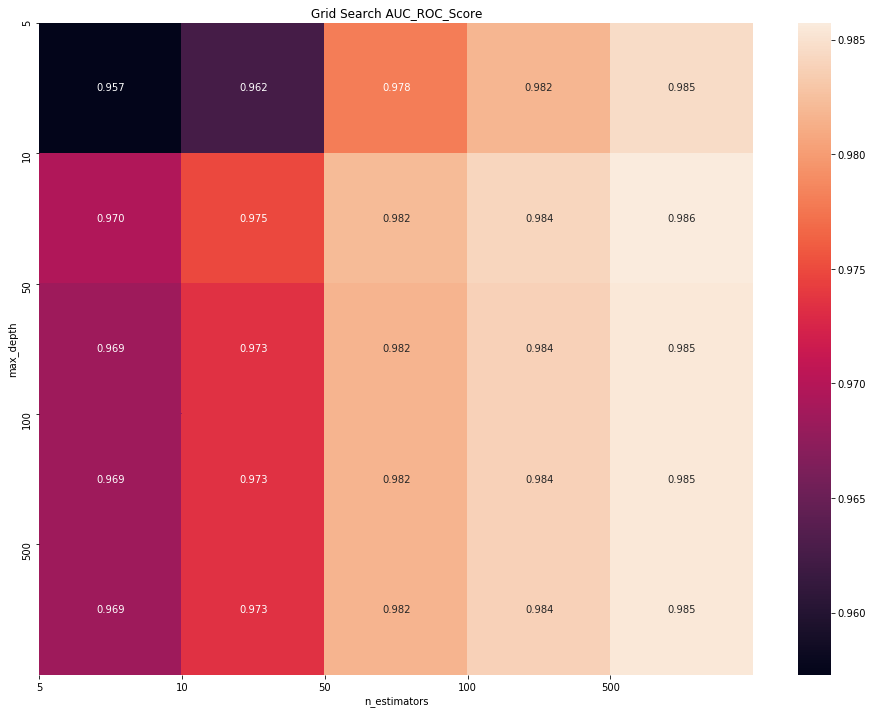

In [20]:
conf_mat(model)

[[27043  1100]
 [  915  9962]]


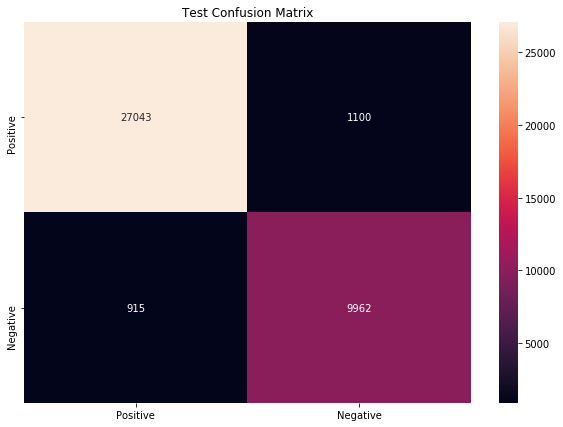

In [35]:
model=test(X_train,X_test)

## Feature Importance

[0.15575019 0.04902415 0.07556599 0.01415678 0.01155915 0.01375144
 0.00851243 0.00563551 0.00796128 0.01419993 0.00760557 0.01707428
 0.02916516 0.01392298 0.00567987 0.03296024 0.20941767 0.01155592
 0.00662522 0.00816405 0.01080961 0.00541684 0.00968741 0.01206158
 0.00651838 0.01052458 0.02946058 0.01411362 0.00796415 0.00933135
 0.00722902 0.03812577 0.00680595 0.00994804 0.00596932 0.00664494
 0.00936656 0.01120433 0.00872996 0.00842447 0.00695663 0.00742954
 0.00923167 0.00542293 0.01064265 0.00989064 0.00649236 0.00667043
 0.00476182 0.00587713]


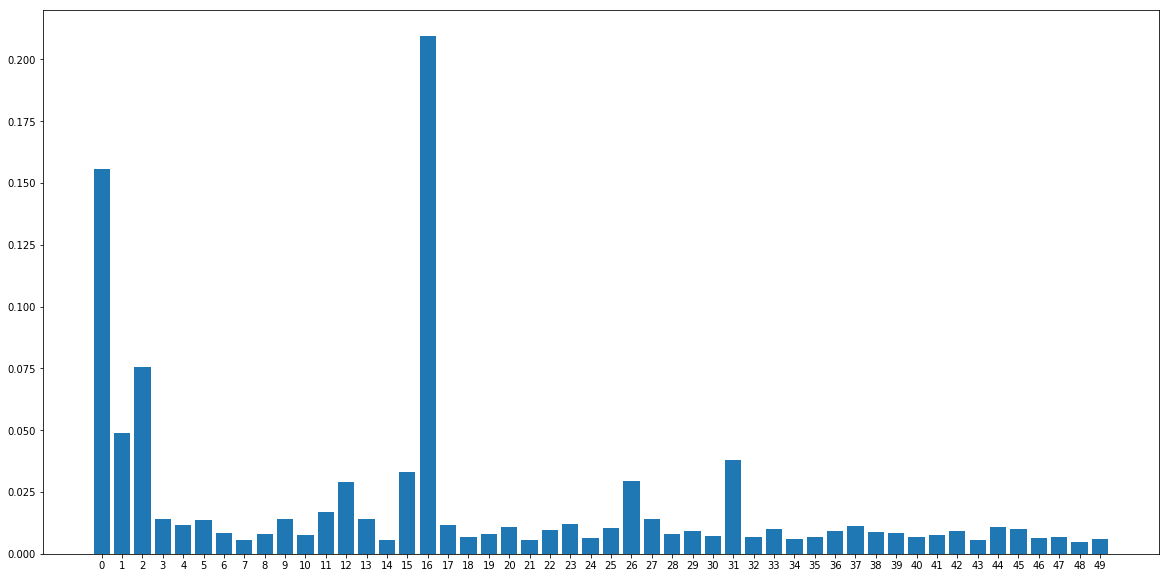

In [45]:
print(model.feature_importances_)
# plot
plt.figure(figsize=(20,10))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.xticks(range(len(model.feature_importances_)))
plt.show()

In [2]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Hyper-parameter", "ACCURACY"]
x.add_row(["KNN", "K: 50", 94.85])
x.add_row(["Logistic Regression", "C:10, Regularization: L2", 96.04])
x.add_row(["XGBoost", "n Estimators: 500, Depth: 10", 98.66])
print(x)

+---------------------+------------------------------+----------+
|        Model        |       Hyper-parameter        | ACCURACY |
+---------------------+------------------------------+----------+
|         KNN         |            K: 50             |  94.85   |
| Logistic Regression |   C:10, Regularization: L2   |  96.04   |
|       XGBoost       | n Estimators: 500, Depth: 10 |  98.66   |
+---------------------+------------------------------+----------+
